In [2]:
pip install seaborn


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector





db = mysql.connector.connect(
    host='localhost',
    user='root',
    password='shalini123',
    database='ecommerce'
)
cur = db.cursor()


# List all unique cities where customers are located.

In [66]:
query=""" select distinct customer_city from customers """

cur.execute(query)

data= cur.fetchall()

df= pd.DataFrame(data)
df.head()

,0
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas


# count the number of ordere placed in 2017

In [18]:
query=""" select count(order_id) from orders where (order_purchase_timestamp)=2017 """

cur.execute(query)

data= cur.fetchall()
"total order placed in 2017 are=",data[0][0]

('total order placed in 2017 are=', 45101)

# find the t0tal sales per category

In [24]:
query="""  select upper(products.product_category) category, round(sum(payments.payment_value),2) sales
 from products join order_items
  on products.product_id=order_items.product_id
   join payments
    on payments.order_id=order_items.order_id
     group by category """

cur.execute(query)

data= cur.fetchall()
df=pd.DataFrame(data,columns=["category", "sales"])
df


,category,sales
0,PERFUMERY,506738.66
1,FURNITURE DECORATION,1430176.39
2,TELEPHONY,486882.05
3,BED TABLE BATH,1712553.67
4,AUTOMOTIVE,852294.33
...,...,...
69,CDS MUSIC DVDS,1199.43
70,LA CUISINE,2913.53
71,FASHION CHILDREN'S CLOTHING,785.67
72,PC GAMER,2174.43


# calculate the percentage of orders that were paid in installments

In [35]:
query=""" select (sum(case when payment_installments>=1 then 1 else 0 end)/ count(*))*100 from 
payments """

cur.execute(query)

data= cur.fetchall()
data

[(Decimal('99.9981'),)]

# count the number of customer from each state

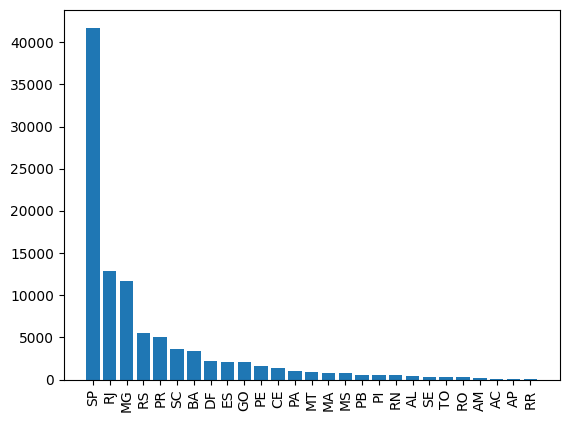

In [62]:
query=""" select customer_state , count(customer_id) from customers group by customer_state; """

cur.execute(query)

data= cur.fetchall()
df=pd.DataFrame(data,columns=('state','customers'))
df=df.sort_values(by="customers",ascending=0) 


plt.bar(df['state'],df['customers'])
plt.xticks(rotation =90)
plt.show()

# calculate the number of order per month in 2018

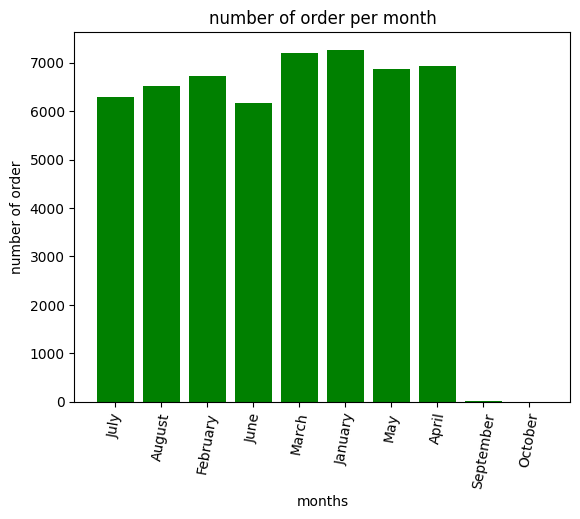

In [101]:
query=""" select monthname(order_purchase_timestamp) months ,count(order_id) from orders where year(order_purchase_timestamp)=2018
group by months"""

cur.execute(query)

data= cur.fetchall()
df=pd.DataFrame( data,columns=["months","num_order"])
#o=["jan","feb","mar","apr","may","jun","jul","aug","sep","oct","nov","dec"]

#ax=sns.barplot( x=df["months"], y=df["num_order"] ,data = df ,order=o)
plt.bar(df["months"], df["num_order"] ,color='green')
plt.xticks(rotation=80)
#ax.bar_label(ax.containers[0])
plt.xlabel("months")
plt.ylabel("number of order")
plt.title("number of order per month")
plt.show()

# Average number of products per order, grouped by city